<a href="https://colab.research.google.com/github/KaioLopesS/SDSS17---Stellar-Classification/blob/main/SDSS17_Stellar_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Stars, Galaxies and Quasars**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data= pd.read_csv('/content/star_classification.csv')

In [48]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [49]:
data.shape

(100000, 18)

In [50]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [51]:
data['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


In [52]:
data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [53]:
data.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


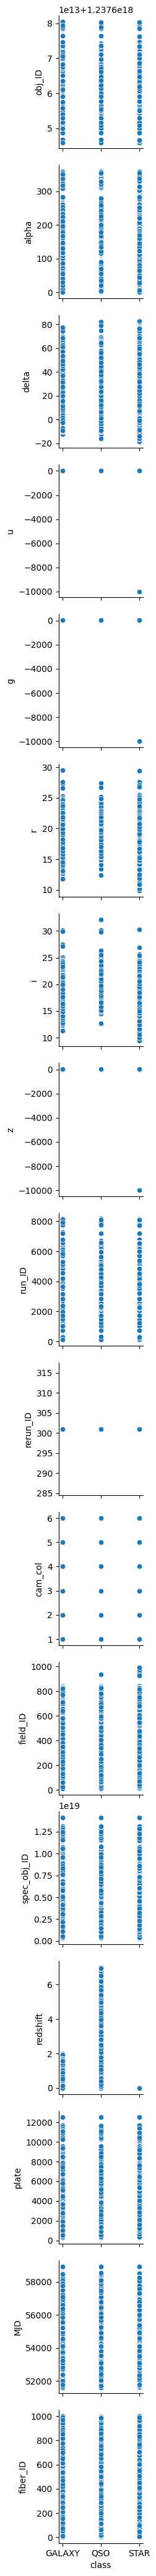

In [54]:
sns.pairplot(data, x_vars='class')

In [55]:
y = data["class"]
x = data.drop(["class", "obj_ID"], axis = 1)

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [57]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
unique_values = np.unique(y)
print(unique_values)

[0 1 2]





# **Classification**
# 0 - Galaxy
# 1 - QSO
# 2 - Star

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 2048)

# **Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [61]:
for i in range(1, 11):
  Forest = RandomForestClassifier(n_estimators=i, random_state = 2048)
  Forest.fit(x_train, y_train)
  forest_predict = Forest.predict(x_test)
  print(f'n_estimators={i}, accuracy={accuracy_score(y_test, forest_predict) * 100:.2f}%')




n_estimators=1, accuracy=95.47%
n_estimators=2, accuracy=95.85%
n_estimators=3, accuracy=96.92%
n_estimators=4, accuracy=96.99%
n_estimators=5, accuracy=97.25%
n_estimators=6, accuracy=97.35%
n_estimators=7, accuracy=97.36%
n_estimators=8, accuracy=97.42%
n_estimators=9, accuracy=97.46%
n_estimators=10, accuracy=97.48%


In [62]:
Forest = RandomForestClassifier(n_estimators=10, random_state = 2048)
Forest.fit(x_train, y_train)
forest_predict = Forest.predict(x_test)

In [63]:
print(f"Acurácia: {(accuracy_score(y_test, forest_predict)*100).round(2)}%")

Acurácia: 97.48%


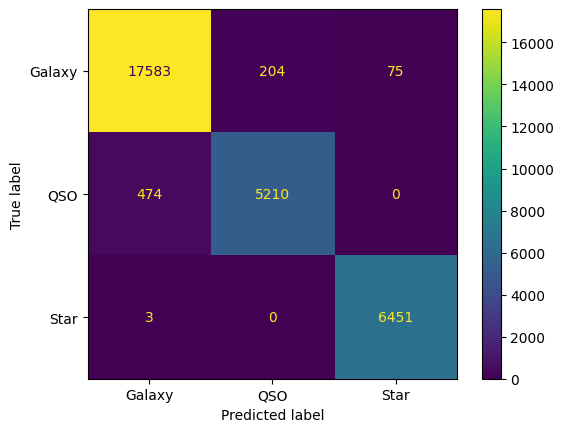

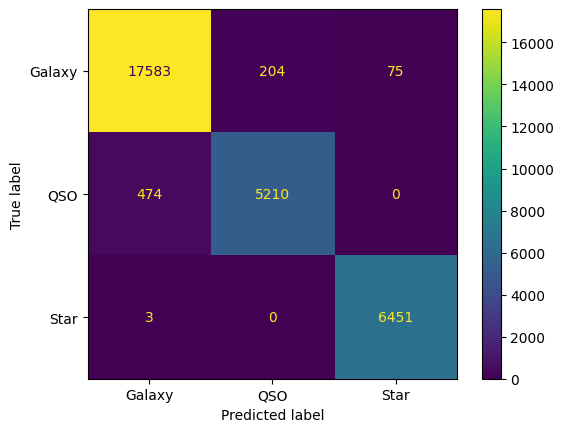

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

matrix_confusion = ConfusionMatrixDisplay.from_predictions(y_test, forest_predict, display_labels = ['Galaxy', 'QSO', 'Star'] )
matrix_confusion.plot()

plt.show()


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest_predict, target_names = ['Galaxy', 'QSO', 'Star'] ))

              precision    recall  f1-score   support

      Galaxy       0.97      0.98      0.98     17862
         QSO       0.96      0.92      0.94      5684
        Star       0.99      1.00      0.99      6454

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000

